In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.shape

(768, 9)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df_copy=df.copy(deep=True)

In [11]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [12]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].median()

Glucose          117.0
BloodPressure     72.0
SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: float64

In [16]:
def fill(col):
    df_copy[col]=df_copy[col].fillna(df_copy[col].median())
    return df_copy

l=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for i in l:
    fill(i)

In [17]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [18]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df_copy.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   32.00000   99.00  
Insulin                   125.0000  127.25000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

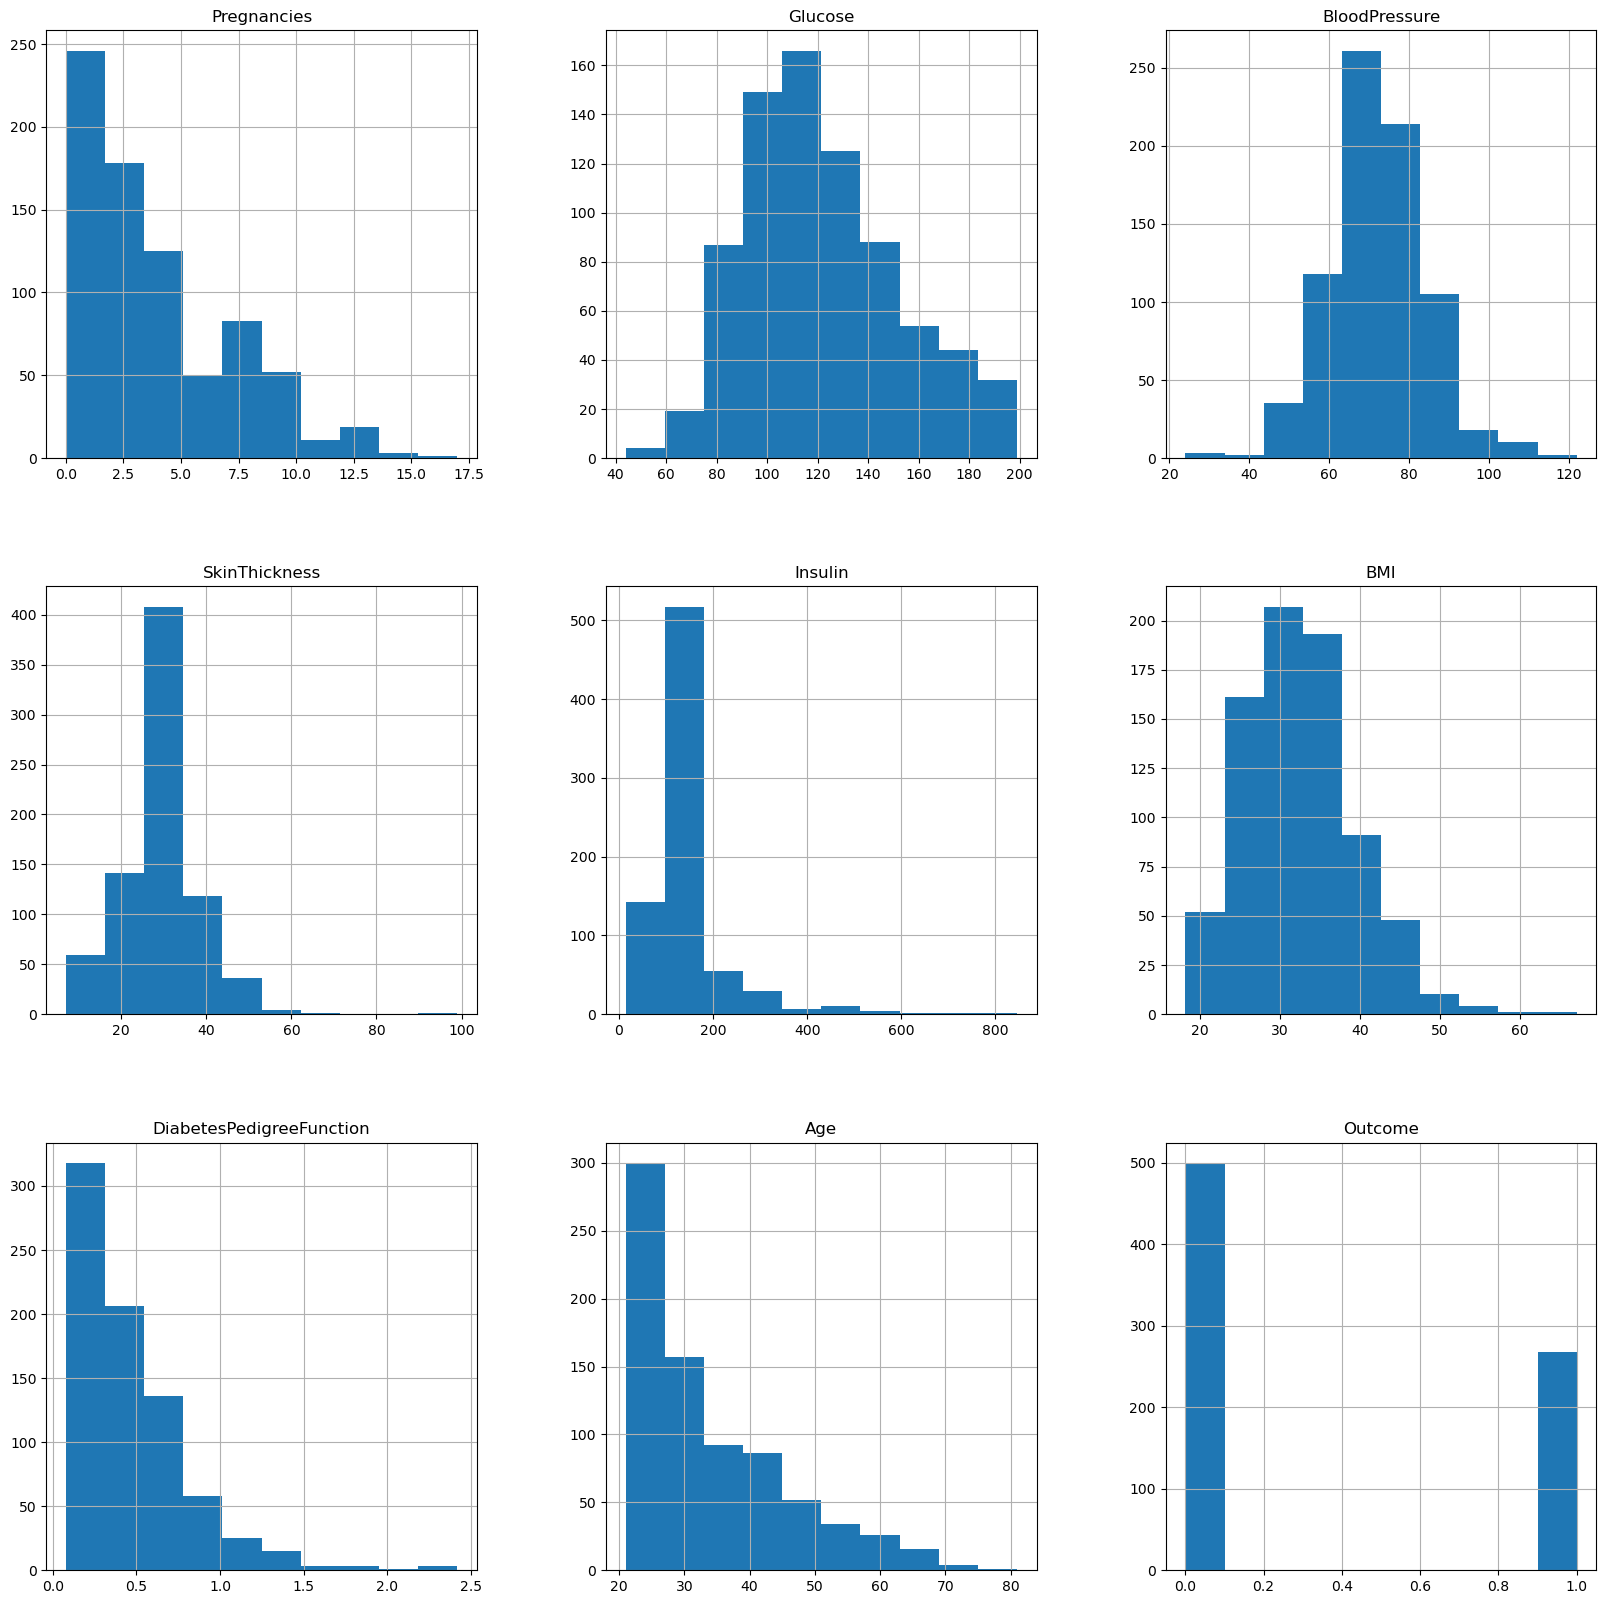

In [20]:
df_copy.hist(figsize=(20,20))

<Axes: xlabel='Outcome'>

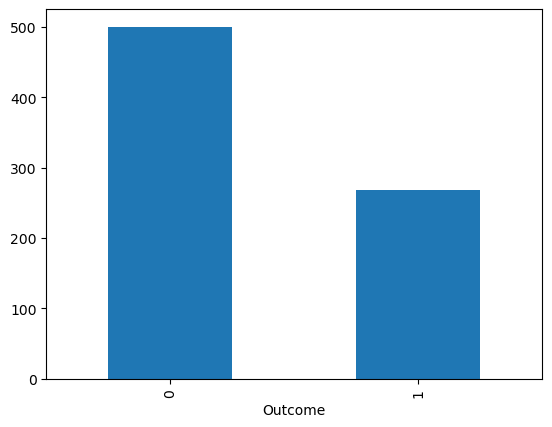

In [21]:
df_copy.Outcome.value_counts().plot(kind="bar")

C:\Users\msi 1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi 1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi 1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msi 1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

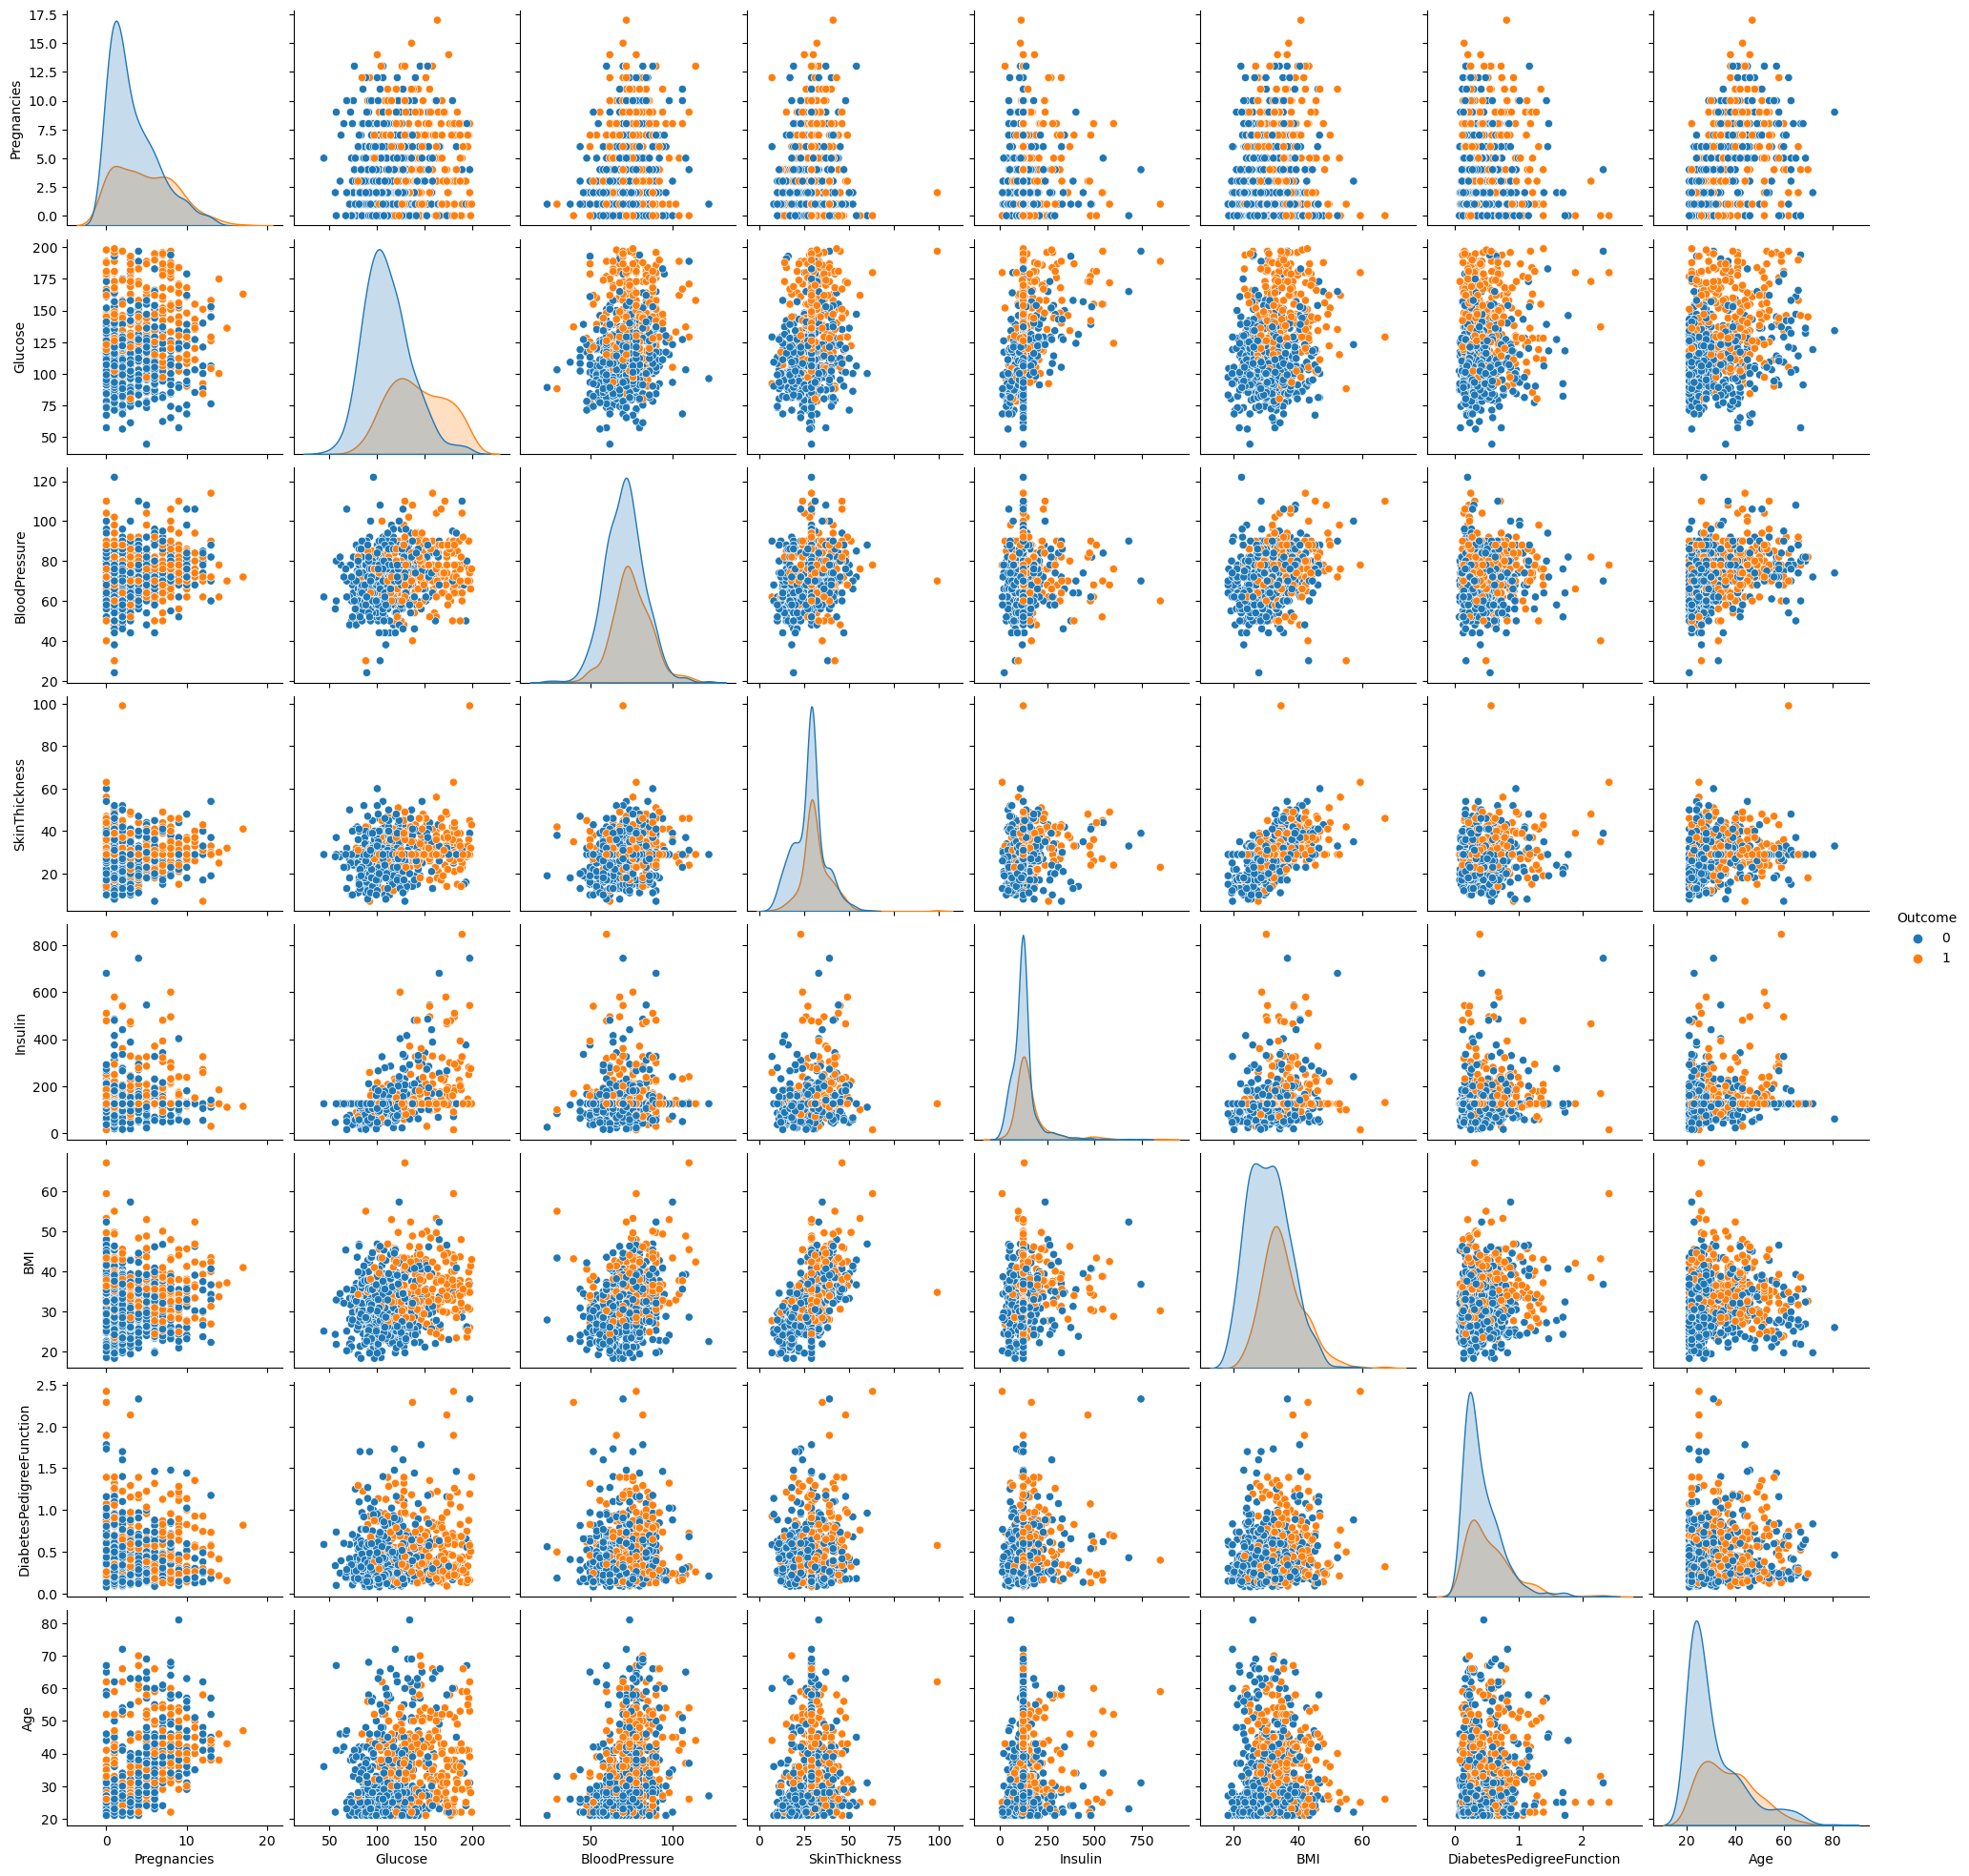

In [22]:
sns.pairplot(df_copy,hue="Outcome")

<Axes: >

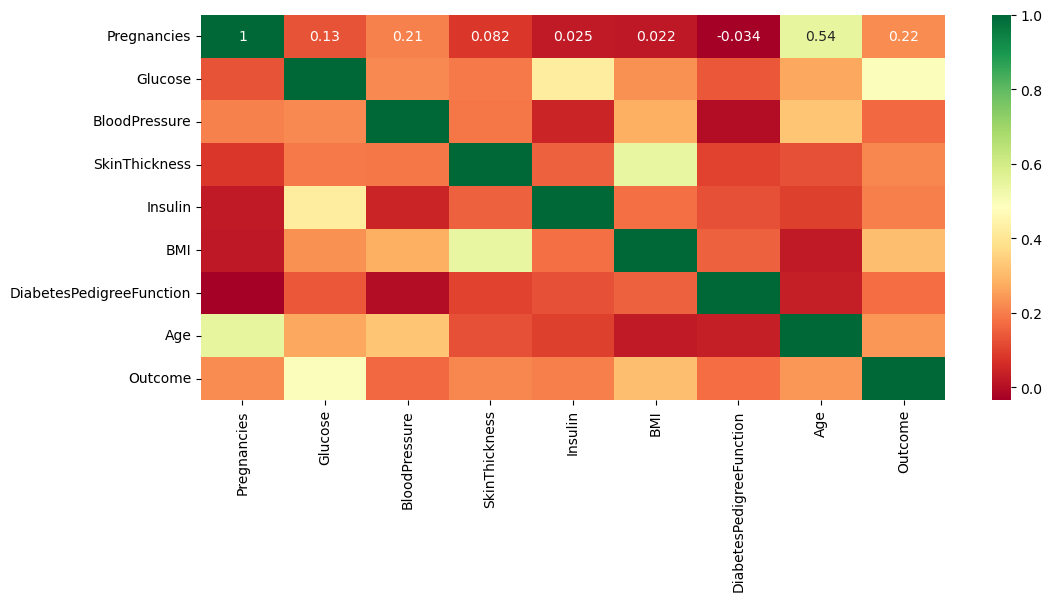

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap(df_copy.corr(),cmap="RdYlGn",annot=True)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(df_copy.drop(["Outcome"],axis=1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'])
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1      -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2       1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679069       0.298896       2.150354  0.455573  0.064737   
764    -0.547919  0.011301      -0.197433      -0.239949 -0.181541  0.632365   
765     0.342981 -0.021574      -0.031990      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.142800      -1.024647      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.942068      -0.197433       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [26]:
Y=df_copy["Outcome"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,stratify=Y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_scores.append(neigh.score(X_train,Y_train))
    test_scores.append(neigh.score(X_test,Y_test))

In [31]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 80.94462540716613 for k = 7


In [32]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))

Max test_scores is 85.71428571428571 for k = 13


In [33]:
log_model = LogisticRegression(random_state=20, penalty='l2').fit(X_train, Y_train)
log_pred=log_model.predict(X_test)
log_model.score(X_test, Y_test)

0.8116883116883117

In [34]:
svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, Y_test)

0.8181818181818182

In [35]:
rf_model = RandomForestClassifier(max_depth=10, random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)

0.7857142857142857

In [36]:
par={
    "n_estimators":[75,100,120,150],
    "max_depth":[5,10,15,20,25],
    "oob_score":[True,False],
    "criterion":['gini', 'entropy']
    
}

In [37]:
gsc=GridSearchCV(estimator=rf_model,param_grid=par,n_jobs=-1,cv=5)

In [38]:
gsc.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [75, 100, 120, 150],
                         'oob_score': [True, False]})

In [39]:
gsc.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=150, oob_score=True,
                       random_state=20)

In [40]:
rf_model = RandomForestClassifier(max_depth=5,n_estimators=150 , oob_score=True,random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)

0.7922077922077922

In [41]:
# !pip install tensorflow

In [42]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [43]:
# import sys
# print(sys.executable)


In [44]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()

C:\Users\msi 1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
neural_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(X_train, Y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
18/18 - 0s - 24ms/step - accuracy: 0.7989 - loss: 0.4239 - val_accuracy: 0.7419 - val_loss: 0.4384
Epoch 2/100
18/18 - 0s - 13ms/step - accuracy: 0.8007 - loss: 0.4198 - val_accuracy: 0.7419 - val_loss: 0.4411
Epoch 3/100
18/18 - 0s - 13ms/step - accuracy: 0.8062 - loss: 0.4146 - val_accuracy: 0.7419 - val_loss: 0.4464
Epoch 4/100
18/18 - 0s - 13ms/step - accuracy: 0.8007 - loss: 0.4162 - val_accuracy: 0.7581 - val_loss: 0.4491
Epoch 5/100
18/18 - 0s - 11ms/step - accuracy: 0.8062 - loss: 0.4183 - val_accuracy: 0.7581 - val_loss: 0.4498
Epoch 6/100
18/18 - 0s - 12ms/step - accuracy: 0.8080 - loss: 0.4180 - val_accuracy: 0.7419 - val_loss: 0.4454
Epoch 7/100
18/18 - 0s - 12ms/step - accuracy: 0.8170 - loss: 0.4112 - val_accuracy: 0.7581 - val_loss: 0.4476
Epoch 8/100
18/18 - 0s - 12ms/step - accuracy: 0.8043 - loss: 0.4072 - val_accuracy: 0.7581 - val_loss: 0.4491
Epoch 9/100
18/18 - 0s - 13ms/step - accuracy: 0.8098 - loss: 0.4076 - val_accuracy: 0.7581 - val_loss: 0.4674
E

In [48]:
# Let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()

accuracy      loss  val_accuracy  val_loss  epoch
95  0.851449  0.328466      0.806452  0.684434     95
96  0.853261  0.337027      0.806452  0.740536     96
97  0.867754  0.329611      0.806452  0.762654     97
98  0.865942  0.322965      0.822581  0.790604     98
99  0.865942  0.321674      0.774194  0.714432     99

In [49]:
import pickle

pickle.dump(svm_model, open('svm_model.pkl','wb'))